# Importing Modules

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the DataFrame

In [24]:
data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=True')

**Checking the first five records of our data**

In [25]:
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding Columns

## Apply Label Encoder on gender and smoker column

In [26]:
from sklearn.preprocessing import LabelEncoder

label_gender = LabelEncoder()

In [27]:
label_gender.fit(data['gender'])

LabelEncoder()

In [28]:
data['gender'] = label_gender.transform(data['gender'])

In [29]:
label_smoker = LabelEncoder()

In [30]:
label_smoker.fit(data['smoker'])

LabelEncoder()

In [31]:
data['smoker'] = label_smoker.transform(data['smoker'])

## Applying One Hot Encoding on region column

In [32]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

In [33]:
one_hot.fit(data[['region']])

OneHotEncoder()

In [34]:
arr = one_hot.transform(data[['region']]).toarray()

In [35]:
arr

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [36]:
one_hot.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

## Making the temp data frame with encoded data to concat

In [37]:
region = pd.DataFrame(arr,columns=['northeast', 'northwest', 'southeast', 'southwest'],dtype='int')
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [38]:
data = pd.concat([data,region],axis=1)

## Droping the old region column

In [39]:
data.drop('region',axis=1,inplace=True)

In [40]:
data.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Splitting the data into training and testing

In [41]:
X = data.drop('charges',axis=1)
Y = data['charges']

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Making ANN model

In [43]:
model = tf.keras.models.Sequential()

# Input Layer with 9 number of nurons
model.add(tf.keras.layers.Input(shape=9))

# Hidden Layers
model.add(tf.keras.layers.Dense(units=14,activation='relu'))
model.add(tf.keras.layers.Dense(units=14,activation='relu'))

# Output Layer
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

# Compiling our model
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


## Fitting our ANN model

In [44]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=40)

Epoch 1/40
34/34 [==============================] - 2s 21ms/step - loss: 327148192.0000 - accuracy: 0.0000e+00 - val_loss: 305739136.0000 - val_accuracy: 0.0000e+00
Epoch 2/40
34/34 [==============================] - 0s 5ms/step - loss: 326999904.0000 - accuracy: 0.0000e+00 - val_loss: 305587584.0000 - val_accuracy: 0.0000e+00
Epoch 3/40
34/34 [==============================] - 0s 5ms/step - loss: 326793824.0000 - accuracy: 0.0000e+00 - val_loss: 305293664.0000 - val_accuracy: 0.0000e+00
Epoch 4/40
34/34 [==============================] - 0s 6ms/step - loss: 326380704.0000 - accuracy: 0.0000e+00 - val_loss: 304763072.0000 - val_accuracy: 0.0000e+00
Epoch 5/40
34/34 [==============================] - 0s 5ms/step - loss: 325721632.0000 - accuracy: 0.0000e+00 - val_loss: 303957760.0000 - val_accuracy: 0.0000e+00
Epoch 6/40
34/34 [==============================] - 0s 5ms/step - loss: 324689920.0000 - accuracy: 0.0000e+00 - val_loss: 302727552.0000 - val_accuracy: 0.0000e+00
Epoch 7/40
34/3

## Storing the model's history

In [46]:
report = model.history.history

In [47]:
report.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Ploting the losses of model

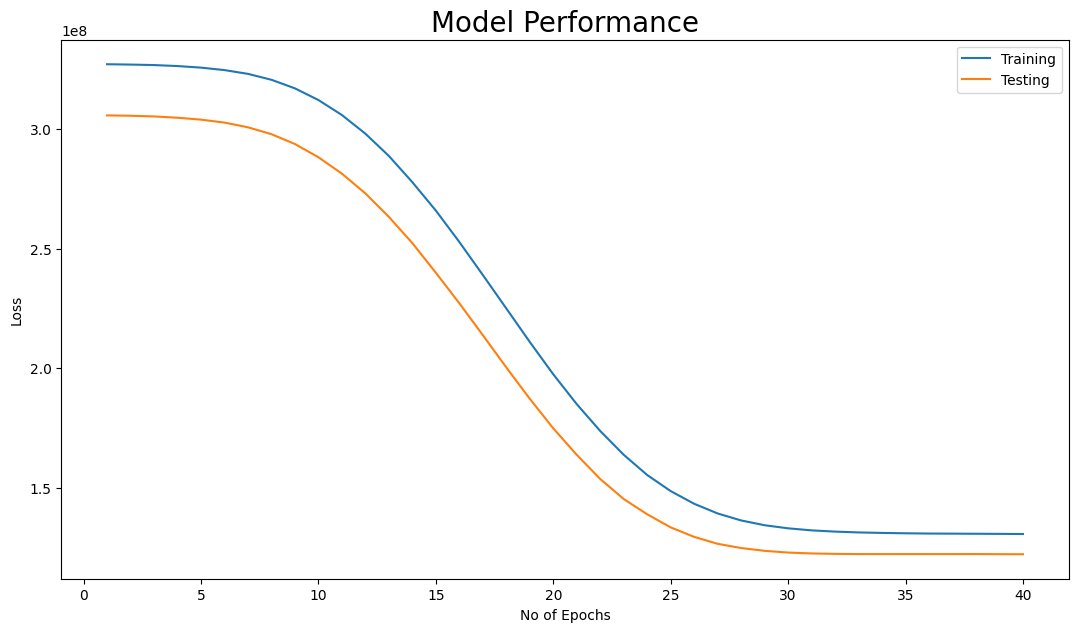

In [50]:
plt.figure(figsize=(13,7))
plt.plot(range(1,41),report['loss'],label='Training')
plt.plot(range(1,41),report['val_loss'],label='Testing')
plt.legend()
plt.title('Model Performance',size=20)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.show()